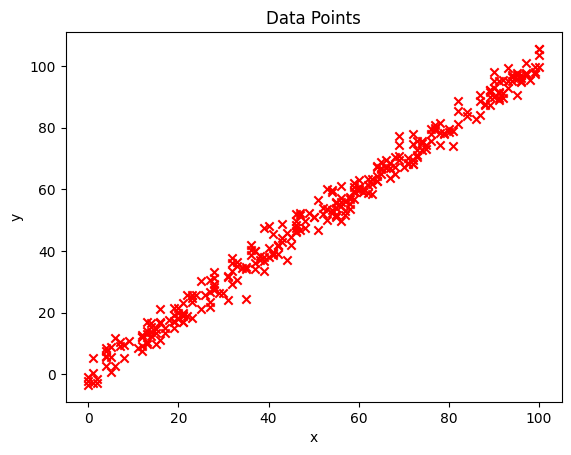

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data set.
df = pd.read_csv('data_set/first_data_set/test.csv')
# Fists rows of the data.
df.head()
x = np.array(df['x'])
y = np.array(df['y'])
m = x.shape[0]
# Plot data points.
plt.scatter(x, y, marker='x', c='r')
# Set title.
plt.title("Data Points")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [7]:
print(f"Number of instances is: {m}")

Number of instances is: 300


# Gradient Descent algorithm
## Description
Repeat until converge
$$
    w = w' - \alpha \cdot \dfrac{\partial}{\partial w}J\left(w, b\right) \\
    b = b' - \alpha \cdot \dfrac{\partial}{\partial b}J\left(w, b\right) \\
$$
where
* $w'$ is the previous value of $w$.
* $b'$ is the previous value of $b$.
* $\alpha$ is the learning rate.


In [49]:
ALPHA = 0.0001

def cost_function(w, b):
    cost = 0
    for i in range(m):
        cost += (w * x[i] + b - y[i]) ** 2
    return (1 / (2 * m)) * cost

def compute_partial_derivative_w(w, b):
    derivative = 0
    for i in range(m):
        derivative += (w * x[i] + b - y[i]) * x[i]
    return (1 / m) * derivative

def compute_partial_derivative_b(w, b):
    derivative = 0
    for i in range(m):
        derivative += w * x[i] + b - y[i]
    return (1 / m) * derivative

def compute_new_w(old_w, old_b):
    return old_w - ALPHA * compute_partial_derivative_w(old_w, old_b)

def compute_new_b(old_w, old_b):
    return old_b - ALPHA * compute_partial_derivative_b(old_w, old_b)

def gradient_descent(num_iters):
    old_w = 0
    old_b = 0
    for i in range(num_iters):
        new_w = compute_new_w(old_w, old_b)
        new_b = compute_new_b(old_w, old_b)
        old_w = new_w
        old_b = new_b
    return (new_w, new_b)

w, b = gradient_descent(10000)
print(f"w: {w}")
print(f"b: {b}")

w: 1.00870991458635
b: -0.08586316258445717


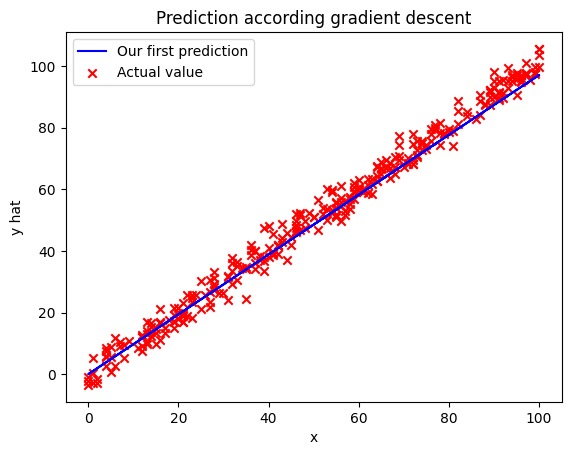

In [44]:
plt.plot(x, (w * x + b), c='b', label='Our first prediction')
plt.scatter(x, y, marker='x', c='r', label='Actual value')
plt.title("Prediction according gradient descent")
plt.ylabel("y hat")
plt.xlabel("x")
plt.legend()
plt.show()